# **Web Scraping With Python using Beautifulsoup**

In [1]:
!pip install requests
!pip install bs4

In [2]:
from bs4  import BeautifulSoup as soup
from urllib.request import urlopen as myReq

historyurl = "https://www.ebay.com/sch/i.html?_from=R40&_trksid=m570.l1313&_nkw=Laptop&_sacat=0"
uClient = myReq(historyurl)
htmlContent = uClient.read()
uClient.close()
psoup = soup(htmlContent,'html.parser')

containers = psoup.findAll("div",{"class": "s-item__wrapper clearfix"})
print(len(containers))

63


In [3]:
print(soup.prettify(containers[0]))
container = containers[0]

#productName
title = container.div.img["alt"]
print(title)

#price
price = container.findAll("span",{"s-item__price"})
print(price[0].text)

#shipping
shipping = container.findAll("span",{"s-item__shipping s-item__logisticsCost"})
print(shipping[0].text)

<div class="s-item__wrapper clearfix">
 <div class="s-item__image-section">
  <div class="s-item__image">
   <a _sp="p2351460.m1686.l7400" aria-hidden="true" data-track='{"eventFamily":"LST","eventAction":"ACTN","actionKind":"NAVSRC","actionKinds":["NAVSRC"],"operationId":"2351460","flushImmediately":false,"eventProperty":{"moduledtl":"mi:1686|iid:1|li:7400|luid:1|scen:UnifiedRankingScenario","parentrq":"a43b48d11750ac0f123acd39fffb3538","pageci":"5f54d05e-2131-11eb-bfe6-f29343095643"}}' href="https://www.ebay.com/itm/DELL-LAPTOP-LATiTUDE-WINDOWS-10-CORE-2-DUO-4GB-RAM-WIN-DVD-WIFI-PC-HD-COMPUTER/151744607899?_trkparms=ispr%3D1&amp;hash=item2354aef69b:g:iU8AAOSwBdhbT3lt&amp;amdata=enc%3AAQAFAAACYBaobrjLl8XobRIiIML1V4Imu%252Fn%252BzU5L90Z278x5ickkxGz2ccqatkEnoeekHqhLkc3XUzNM5v4kbCia39o6xVYGSpwks7YaXBHqMRCJVufZb%252B7kQm1EZ%252F6DNIRbK%252BfXpU55yCux9jhaSYE4Omf7Mezqkn%252Fye4ZiuMOdvsGQT%252F6h3kvbIG3LUZPk%252FMOJJQv4MVVDLIYxiXatuAYhPZqJqkQLPgf6j1mXtwv0J8lxsbIfIoZlhjiLj6QvyRE9RmRjJG0hRH5BQ

In [4]:
records = []

for container in containers:  
    title = container.div.img["alt"]
    print(title)
    
    price = container.findAll("span", {"s-item__price"})
    print(price[0].text.strip())

    shipping = container.findAll("span", {"s-item__shipping s-item__logisticsCost"})
    print(shipping[0].text)
    
    records.append((title, price[0].text.strip(), shipping[0].text.strip()))

DELL LAPTOP LATiTUDE WINDOWS 10 CORE 2 DUO 4GB RAM WIN DVD WIFI PC HD COMPUTER
$233.00
Free shipping
HP Chromebook 11 G4 Laptop Intel 2.16GHz 4GB Memory 16GB SSD Bluetooth Wifi - C
$99.95
Free shipping
*BRAND NEW* 2-in-1 Laptop 13.3” FHD Touchscreen, Intel Core i3, 128GB SSD, Win10
$324.95
Free shipping
HP LAPTOP WINDOWS 10 PC CORE i5 2.4GHz 4GB RAM WiFi DVDRW NOTEBOOK 250GB HD WIN
$289.00
Free shipping
NEW Acer Chromebook 15.6" HD Intel N4000 4GB RAM 32GB eMMC + Protective Sleeve
$249.99
Free shipping
Dell Latitude Business Gaming Laptop HD Intel Core i5 3.20GHz 16GB RAM 2TB SSD
$311.00 to $687.00
Free shipping
Acer Chromebook C720P-2457 11.6" 4GB RAM 32GB SSD White Cosmetic Issue
$109.99
Free shipping
Samsung Chromebook XE303C12 11.6in 16GB, Samsung Exynos 5 Dual-Core
$109.99
Free shipping
NEW - HP 15.6" HD Red Laptop Intel Quad Core 2.7GHz 4GB RAM Webcam Windows 10
$379.95
Free shipping
Alienware M15 15.6" (1TB + 128GB, Intel Core i7 8th Gen., 4.1GHz, 16GB) Laptop -
$202.50
+$40.00 

In [5]:
import pandas as pd 

dataframe = pd.DataFrame(records, columns = ['title', 'price', 'shipping'])
dataframe

,title,price,shipping
0,DELL LAPTOP LATiTUDE WINDOWS 10 CORE 2 DUO 4GB...,$233.00,Free shipping
1,HP Chromebook 11 G4 Laptop Intel 2.16GHz 4GB M...,$99.95,Free shipping
2,*BRAND NEW* 2-in-1 Laptop 13.3” FHD Touchscree...,$324.95,Free shipping
3,HP LAPTOP WINDOWS 10 PC CORE i5 2.4GHz 4GB RAM...,$289.00,Free shipping
4,"NEW Acer Chromebook 15.6"" HD Intel N4000 4GB R...",$249.99,Free shipping
...,...,...,...
58,Dell Latitude E7240 i7-4600U 2.1GHz 16GB RAM 2...,$225.00,Free shipping
59,"Acer Aspire 3 15.6"" Laptop AMD Athlon 3020E 4G...",$329.00,Free shipping
60,"HP Chromebook 14 G1 SMB F7W49UA#ABA 14"" 4GB RA...",$139.99,Free shipping
61,Dell Gaming laptop Intel E6530 i7 3720QM 8G 50...,$379.99,Free shipping


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
dataframe.to_csv(r"/content/drive/My Drive/data.csv")

In [8]:
from csv import reader, writer
import matplotlib.pyplot as plt
import seaborn as sns

dr = pd.read_csv(r"/content/drive/My Drive/data.csv", delimiter = ',', quotechar = '"', encoding = 'latin1')
dr.shape

(63, 4)

In [9]:
dr.shipping.value_counts()

Free shipping       56
+$18.95 shipping     2
+$15.40 shipping     1
+$29.20 shipping     1
+$40.00 shipping     1
+$15.70 shipping     1
+$14.99 shipping     1
Name: shipping, dtype: int64

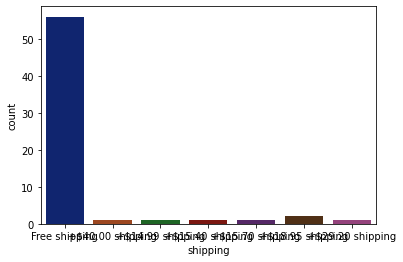

In [10]:
sns.countplot(x="shipping", data=dr, palette="dark")
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 157 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 159 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 157 missing from current font.
  font.set_text(s, 0, fla

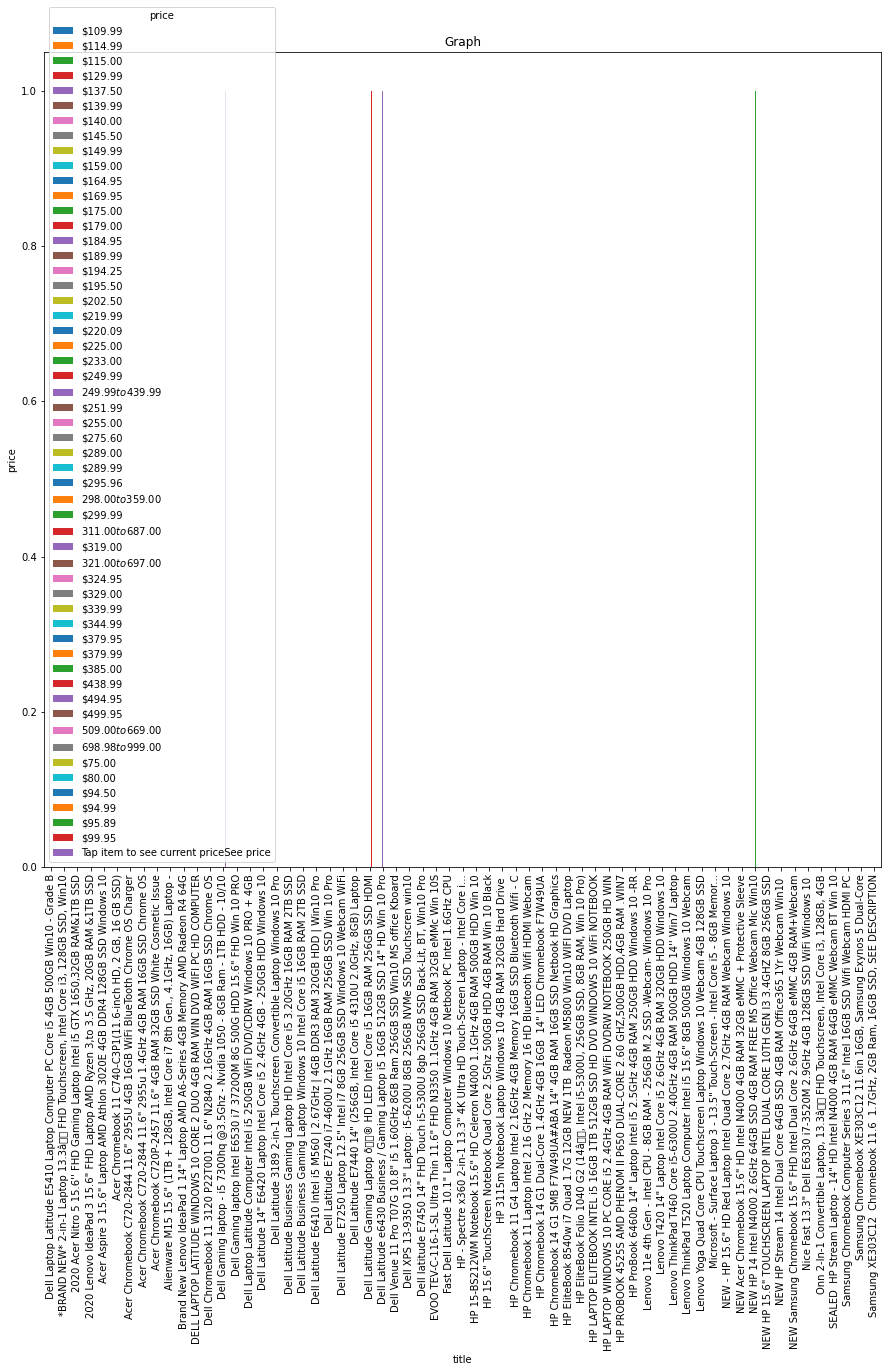

In [11]:
pd.crosstab(dr.title, dr.price).plot(kind="bar", figsize=(15,15))

plt.title('Graph')
plt.xlabel('title')
plt.ylabel('price')
plt.show()